<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [2]:
# type your code here
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the first dataset and check the first two observations

In [3]:
# load your data
# type your code here

data=pd.read_csv('winequality-white.csv',sep=';')

In [4]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [5]:
data['quality']

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

In [6]:
data['quality'].value_counts()

#This is not suitable as output is categorical and has multiple discrete levels. Op should be continuous for LR
#This dataset maybe useful for classification

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [7]:
# check data types of variables
# type your code here

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# type your code here

data['volatile acidity']

# When we do tranformation ? - if Data isnt normal distributed we do transformation.

# So check skew.if values are not in tange -0.5 to +5 then we need transformation

0       0.27
1       0.30
2       0.28
3       0.23
4       0.23
        ... 
4893    0.21
4894    0.32
4895    0.24
4896    0.29
4897    0.21
Name: volatile acidity, Length: 4898, dtype: float64

In [9]:
data['volatile acidity'].skew()

1.5769795029952025

In [10]:
np.log(data['volatile acidity']).skew()

0.13938315393329148

In [11]:
#Transformation famous one is boxcox. statsistical way of checking normality
import scipy.stats as stats
trans,lam=stats.boxcox(data['volatile acidity'])
trans,lam
#see around 3:35:00

(array([-1.41705775, -1.29466771, -1.37463811, ..., -1.55571051,
        -1.33388118, -1.715275  ]),
 -0.11922028222037202)

In [12]:
pd.DataFrame(trans).skew()

0   -0.005003
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here
data['residual sugar'].skew()

1.0770937564240868

In [14]:
np.log(data['residual sugar']).skew()

-0.1611568975182972

In [15]:
np.power(data['residual sugar'],0.5).skew() #square root transform with 0.5 is nothing but power transform 

#But log seems better

0.31620347950253724

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here

data.std()

#std=0 no deviation data which means all values are almost same. That column doesnt contain useful info.

fixed acidity            0.843868
volatile acidity         0.100795
citric acid              0.121020
residual sugar           5.072058
chlorides                0.021848
free sulfur dioxide     17.007137
total sulfur dioxide    42.498065
density                  0.002991
pH                       0.151001
sulphates                0.114126
alcohol                  1.230621
quality                  0.885639
dtype: float64

In [17]:
data.isna().sum()
#if more missing then they can be called insignifcant.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
data.corr()  #can be done this way also 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here

#same as 1 and 2

In [20]:
data['alcohol'].skew()

0.4873419932161276

In [21]:
np.log(data['alcohol']).skew()

0.310134622964236

In [22]:
np.power(data['alcohol'],0.5).skew()

0.3978909427590142

In [23]:
trans,lam=stats.boxcox(data['alcohol'])
pd.DataFrame(trans).skew()

0    0.059296
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# type your code here

#Model 1 - Build model without scaling

In [25]:
x=data.drop('quality',axis=1)
y=data['quality']
xc1=sm.add_constant(x)

In [26]:
ols=sm.OLS(y,xc1)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:04:38   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  150.1928     18.804      7.987      0.000     113.328     187.057
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
data['pH_Scaled']=data['pH']-data['pH'].mean()
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pH_Scaled
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,-0.188267
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0.111733
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0.071733
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0.001733
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0.001733
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.081733
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,-0.038267
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,-0.198267
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.151733


In [28]:
x2=data.drop(['pH','quality'],axis=1)
y2=data['quality']
xc2=sm.add_constant(x2)

In [29]:
ols=sm.OLS(y2,xc2)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:04:38   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  152.3811     19.013      8.015      0.000     115.108     189.655
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
pH_Scaled                0.6863      0.105      6.513      0.000       0.480       0.893
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'pH_Scaled'],
      dtype='object')

In [31]:
inp1=data.drop(['pH_Scaled','quality'],axis=1)
inp1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [32]:
inp_scaling=inp1-inp1.mean()
inp_scaling

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.145212,-0.008241,0.025808,14.308585,-0.000772,9.691915,31.639343,0.006973,-0.188267,-0.039847,-1.714267
1,-0.554788,0.021759,0.005808,-4.791415,0.003228,-21.308085,-6.360657,-0.000027,0.111733,0.000153,-1.014267
2,1.245212,0.001759,0.065808,0.508585,0.004228,-5.308085,-41.360657,0.001073,0.071733,-0.049847,-0.414267
3,0.345212,-0.048241,-0.014192,2.108585,0.012228,11.691915,47.639343,0.001573,0.001733,-0.089847,-0.614267
4,0.345212,-0.048241,-0.014192,2.108585,0.012228,11.691915,47.639343,0.001573,0.001733,-0.089847,-0.614267
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.654788,-0.068241,-0.044192,-4.791415,-0.006772,-11.308085,-46.360657,-0.002887,0.081733,0.010153,0.685733
4894,-0.254788,0.041759,0.025808,1.608585,0.001228,21.691915,29.639343,0.000873,-0.038267,-0.029847,-0.914267
4895,-0.354788,-0.038241,-0.144192,-5.191415,-0.004772,-5.308085,-27.360657,-0.001487,-0.198267,-0.029847,-1.114267
4896,-1.354788,0.011759,-0.034192,-5.291415,-0.023772,-15.308085,-28.360657,-0.005337,0.151733,-0.109847,2.285733


In [33]:
x=inp_scaling
y=data['quality']
x_c=sm.add_constant(x)
x_c

,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,0.145212,-0.008241,0.025808,14.308585,-0.000772,9.691915,31.639343,0.006973,-0.188267,-0.039847,-1.714267
1,1.0,-0.554788,0.021759,0.005808,-4.791415,0.003228,-21.308085,-6.360657,-0.000027,0.111733,0.000153,-1.014267
2,1.0,1.245212,0.001759,0.065808,0.508585,0.004228,-5.308085,-41.360657,0.001073,0.071733,-0.049847,-0.414267
3,1.0,0.345212,-0.048241,-0.014192,2.108585,0.012228,11.691915,47.639343,0.001573,0.001733,-0.089847,-0.614267
4,1.0,0.345212,-0.048241,-0.014192,2.108585,0.012228,11.691915,47.639343,0.001573,0.001733,-0.089847,-0.614267
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,1.0,-0.654788,-0.068241,-0.044192,-4.791415,-0.006772,-11.308085,-46.360657,-0.002887,0.081733,0.010153,0.685733
4894,1.0,-0.254788,0.041759,0.025808,1.608585,0.001228,21.691915,29.639343,0.000873,-0.038267,-0.029847,-0.914267
4895,1.0,-0.354788,-0.038241,-0.144192,-5.191415,-0.004772,-5.308085,-27.360657,-0.001487,-0.198267,-0.029847,-1.114267
4896,1.0,-1.354788,0.011759,-0.034192,-5.291415,-0.023772,-15.308085,-28.360657,-0.005337,0.151733,-0.109847,2.285733


In [34]:
ols=sm.OLS(y,x_c)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:04:39   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8779      0.011    547.502      0.000       5.857       5.899
fixed acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free sulfur dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total sulfur dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     7.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [36]:
inp_scaling.shape[1]
vif=pd.DataFrame()

In [37]:
vif['VIF']=[variance_inflation_factor(inp_scaling.values,i) for i in range(inp_scaling.shape[1])]
vif['Features']=inp_scaling.columns
vif.sort_values('VIF',ascending=False)

,VIF,Features
7,28.232546,density
3,12.644064,residual sugar
10,7.706957,alcohol
0,2.691435,fixed acidity
6,2.239233,total sulfur dioxide
8,2.196362,pH
5,1.787880,free sulfur dioxide
4,1.236822,chlorides
2,1.165215,citric acid
1,1.141156,volatile acidity


In [38]:
data.corr()['quality']

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
pH_Scaled               0.099427
Name: quality, dtype: float64

In [39]:
inpv2=inp_scaling.drop('residual sugar',axis=1)
# residual sugar as it has less corr

In [40]:
inpv2.shape[1]

10

In [41]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv2.values,i) for i in range(inpv2.shape[1])]
vif['Features']=inpv2.columns
vif.sort_values('VIF',ascending=False)

,VIF,Features
6,3.204648,density
9,3.006529,alcohol
5,2.199254,total sulfur dioxide
4,1.730956,free sulfur dioxide
0,1.465467,fixed acidity
7,1.309198,pH
3,1.188737,chlorides
2,1.162848,citric acid
1,1.136249,volatile acidity
8,1.057428,sulphates


In [42]:
#Multi collinearity has been removed

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
out=data['quality']
inp_c=sm.add_constant(inpv2)

In [44]:
ols=sm.OLS(out,inp_c)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     175.9
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          4.45e-317
Time:                        17:04:41   Log-Likelihood:                -5601.8
No. Observations:                4898   AIC:                         1.123e+04
Df Residuals:                    4887   BIC:                         1.130e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8779      0.011    541.108      0.000       5.857       5.899
fixed acidity           -0.0870      0.016     -5.581      0.000      -0.118      -0.056
volatile acidity        -1.9440      0.115    -16.920      0.000      -2.169      -1.719
citric acid             -0.0246      0.097     -0.254      0.799      -0.214       0.165
chlorides               -1.4138      0.542     -2.608      0.009      -2.477      -0.351
free sulfur dioxide      0.0054      0.001      6.382      0.000       0.004       0.007
total sulfur dioxide    -0.0008      0.000     -2.196      0.028      -0.002   -8.94e-05
density                 44.1247      6.502      6.786      0.000      31.377      56.872
pH                      -0.0386      0.082     -0.469      0.639      -0.200       0.123
sulphates                0.3414      0.098      3.488      0.000       0.150       0.533
alcohol                  0.3982      0.015     26.017      0.000       0.368       0.428
==============================================================================
Omnibus:                      112.802   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.096
Skew:                           0.069   Prob(JB):                     1.34e-54
Kurtosis:                       4.094   Cond. No.                     2.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
ypred=ols_mod.predict(inp_c)
ypred

0       5.526041
1       5.360781
2       5.627111
3       5.741789
4       5.741789
          ...   
4893    6.202124
4894    5.573880
4895    5.475816
4896    6.580243
4897    6.329980
Length: 4898, dtype: float64

In [46]:
residue= out-ypred
residue

0       0.473959
1       0.639219
2       0.372889
3       0.258211
4       0.258211
          ...   
4893   -0.202124
4894   -0.573880
4895    0.524184
4896    0.419757
4897   -0.329980
Length: 4898, dtype: float64

In [47]:
ols_mod.resid.skew()

#No not violated

0.06934544070055612

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
inpv2['citric acid'].skew()

1.2819203981671068

In [49]:
out=data['quality']
inp_c=sm.add_constant(inpv2)

ols=sm.OLS(out,inp_c)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     175.9
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          4.45e-317
Time:                        17:04:41   Log-Likelihood:                -5601.8
No. Observations:                4898   AIC:                         1.123e+04
Df Residuals:                    4887   BIC:                         1.130e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8779      0.011    541.108      0.000       5.857       5.899
fixed acidity           -0.0870      0.016     -5.581      0.000      -0.118      -0.056
volatile acidity        -1.9440      0.115    -16.920      0.000      -2.169      -1.719
citric acid             -0.0246      0.097     -0.254      0.799      -0.214       0.165
chlorides               -1.4138      0.542     -2.608      0.009      -2.477      -0.351
free sulfur dioxide      0.0054      0.001      6.382      0.000       0.004       0.007
total sulfur dioxide    -0.0008      0.000     -2.196      0.028      -0.002   -8.94e-05
density                 44.1247      6.502      6.786      0.000      31.377      56.872
pH                      -0.0386      0.082     -0.469      0.639      -0.200       0.123
sulphates                0.3414      0.098      3.488      0.000       0.150       0.533
alcohol                  0.3982      0.015     26.017      0.000       0.368       0.428
==============================================================================
Omnibus:                      112.802   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.096
Skew:                           0.069   Prob(JB):                     1.34e-54
Kurtosis:                       4.094   Cond. No.                     2.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
inpv2['citric acid']

0       0.025808
1       0.005808
2       0.065808
3      -0.014192
4      -0.014192
          ...   
4893   -0.044192
4894    0.025808
4895   -0.144192
4896   -0.034192
4897    0.045808
Name: citric acid, Length: 4898, dtype: float64

In [51]:
inpv2['citric acid']=np.log1p(inpv2['citric acid'])

In [52]:
inpv2['citric acid'].head()

0    0.025481
1    0.005792
2    0.063734
3   -0.014293
4   -0.014293
Name: citric acid, dtype: float64

In [53]:
inpv2
#yes its reflected in it so we can build our model using it

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.145212,-0.008241,0.025481,-0.000772,9.691915,31.639343,0.006973,-0.188267,-0.039847,-1.714267
1,-0.554788,0.021759,0.005792,0.003228,-21.308085,-6.360657,-0.000027,0.111733,0.000153,-1.014267
2,1.245212,0.001759,0.063734,0.004228,-5.308085,-41.360657,0.001073,0.071733,-0.049847,-0.414267
3,0.345212,-0.048241,-0.014293,0.012228,11.691915,47.639343,0.001573,0.001733,-0.089847,-0.614267
4,0.345212,-0.048241,-0.014293,0.012228,11.691915,47.639343,0.001573,0.001733,-0.089847,-0.614267
...,...,...,...,...,...,...,...,...,...,...
4893,-0.654788,-0.068241,-0.045198,-0.006772,-11.308085,-46.360657,-0.002887,0.081733,0.010153,0.685733
4894,-0.254788,0.041759,0.025481,0.001228,21.691915,29.639343,0.000873,-0.038267,-0.029847,-0.914267
4895,-0.354788,-0.038241,-0.155709,-0.004772,-5.308085,-27.360657,-0.001487,-0.198267,-0.029847,-1.114267
4896,-1.354788,0.011759,-0.034790,-0.023772,-15.308085,-28.360657,-0.005337,0.151733,-0.109847,2.285733


In [54]:
out=data['quality']
inp_c1=sm.add_constant(inpv2)

ols=sm.OLS(out,inp_c1)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     175.9
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          4.21e-317
Time:                        17:04:42   Log-Likelihood:                -5601.7
No. Observations:                4898   AIC:                         1.123e+04
Df Residuals:                    4887   BIC:                         1.130e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8782      0.011    540.009      0.000       5.857       5.900
fixed acidity           -0.0892      0.016     -5.710      0.000      -0.120      -0.059
volatile acidity        -1.9289      0.116    -16.666      0.000      -2.156      -1.702
citric acid              0.0424      0.102      0.417      0.677      -0.157       0.242
chlorides               -1.4566      0.542     -2.687      0.007      -2.519      -0.394
free sulfur dioxide      0.0053      0.001      6.365      0.000       0.004       0.007
total sulfur dioxide    -0.0008      0.000     -2.230      0.026      -0.002      -0.000
density                 43.7786      6.506      6.729      0.000      31.024      56.533
pH                      -0.0347      0.082     -0.422      0.673      -0.196       0.127
sulphates                0.3377      0.098      3.449      0.001       0.146       0.530
alcohol                  0.3972      0.015     25.897      0.000       0.367       0.427
==============================================================================
Omnibus:                      113.094   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.701
Skew:                           0.071   Prob(JB):                     9.89e-55
Kurtosis:                       4.095   Cond. No.                     2.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
out=data['quality']
inp_c2=sm.add_constant(inpv2)

ols=sm.OLS(out,inp_c2)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     175.9
Date:                Fri, 18 Dec 2020   Prob (F-statistic):          4.21e-317
Time:                        17:04:42   Log-Likelihood:                -5601.7
No. Observations:                4898   AIC:                         1.123e+04
Df Residuals:                    4887   BIC:                         1.130e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8782      0.011    540.009      0.000       5.857       5.900
fixed acidity           -0.0892      0.016     -5.710      0.000      -0.120      -0.059
volatile acidity        -1.9289      0.116    -16.666      0.000      -2.156      -1.702
citric acid              0.0424      0.102      0.417      0.677      -0.157       0.242
chlorides               -1.4566      0.542     -2.687      0.007      -2.519      -0.394
free sulfur dioxide      0.0053      0.001      6.365      0.000       0.004       0.007
total sulfur dioxide    -0.0008      0.000     -2.230      0.026      -0.002      -0.000
density                 43.7786      6.506      6.729      0.000      31.024      56.533
pH                      -0.0347      0.082     -0.422      0.673      -0.196       0.127
sulphates                0.3377      0.098      3.449      0.001       0.146       0.530
alcohol                  0.3972      0.015     25.897      0.000       0.367       0.427
==============================================================================
Omnibus:                      113.094   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.701
Skew:                           0.071   Prob(JB):                     9.89e-55
Kurtosis:                       4.095   Cond. No.                     2.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
ypred=ols_mod.predict(inp_c2)
ypred

0       5.525927
1       5.364857
2       5.629938
3       5.738757
4       5.738757
          ...   
4893    6.201478
4894    5.576978
4895    5.467889
4896    6.583455
4897    6.337169
Length: 4898, dtype: float64

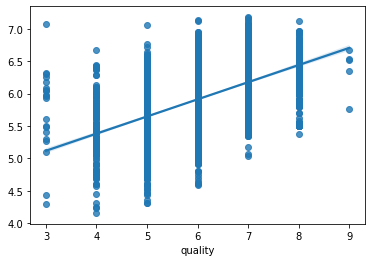

In [57]:
sns.regplot(out,ypred)
plt.show()

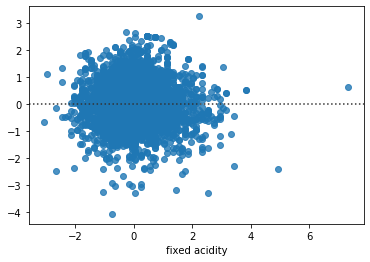

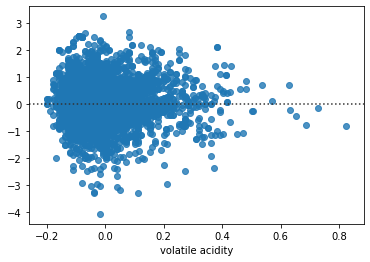

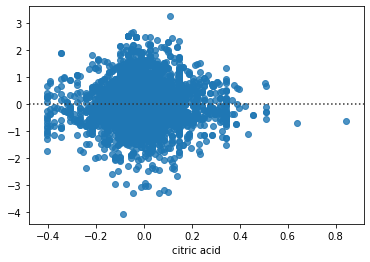

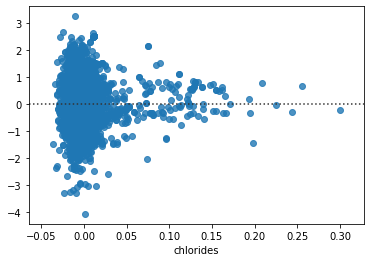

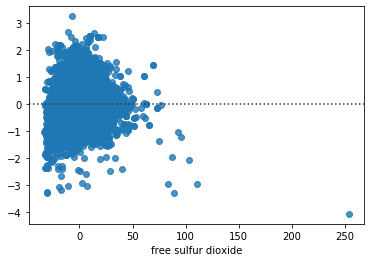

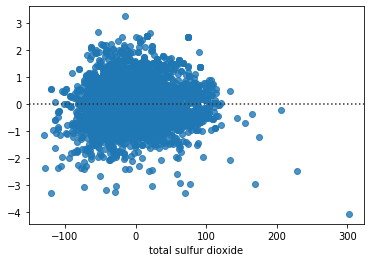

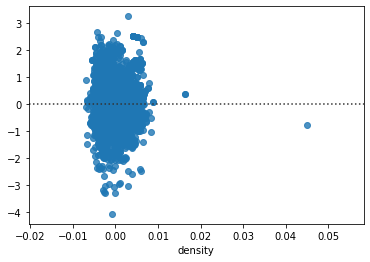

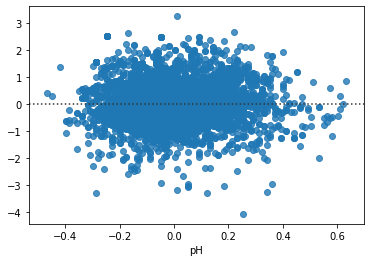

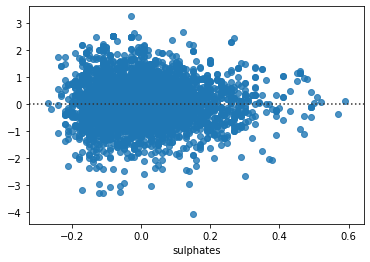

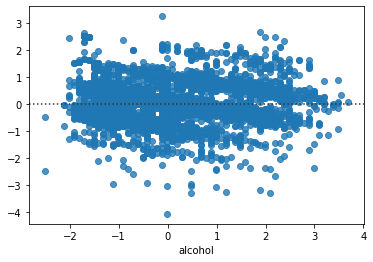

In [58]:
for i in inpv2.columns:
    sns.residplot(inpv2[i],ols_mod.resid)
    plt.show()

In [59]:
from statsmodels.stats.diagnostic import linear_rainbow

In [60]:
linear_rainbow(res=ols_mod,frac=0.5) 


(1.0553023899452434, 0.09174040745607985)

<a id="sel"> </a>
## 2. Feature Selection

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [63]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(inpv2,out,test_size=0.3,random_state=10)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
# type your code here
lr=LinearRegression()
lr_forward=sfs(estimator=lr,k_features=5,forward=True,scoring='r2')


In [65]:
sfs_forward=lr_forward.fit(inpv2,out) 
feat_forw=(sfs_forward.k_feature_names_)
print(feat_forw)
print(sfs_forward.k_score_)

('fixed acidity', 'volatile acidity', 'free sulfur dioxide', 'density', 'alcohol')
0.23547329084134505


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
lr=LinearRegression()
lr_backward=sfs(estimator=lr,k_features=5,forward=False,scoring='r2')
sfs_backward=lr_backward.fit(inpv2,out)
feat_back=(sfs_backward.k_feature_names_)
print(feat_back)
print(sfs_backward.k_score_)

('fixed acidity', 'volatile acidity', 'free sulfur dioxide', 'density', 'alcohol')
0.23547329084134505


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [67]:
lr=LinearRegression()
lr_forward=sfs(estimator=lr,k_features=(2,6),forward=True,scoring='r2')
sfs_forward=lr_forward.fit(inpv2,out)
feat_forward=(sfs_forward.k_feature_names_)
print(feat_forward)
print(sfs_forward.k_score_)

('fixed acidity', 'volatile acidity', 'chlorides', 'free sulfur dioxide', 'density', 'alcohol')
0.23653274119030368


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [68]:
# type your code here
lr=LinearRegression()
lr_backward=sfs(estimator=lr,k_features='best',forward=True,scoring='r2')
sfs_backward=lr_backward.fit(inpv2,out)
feat_back=(sfs_backward.k_feature_names_)
print(feat_back)
print(sfs_backward.k_score_)

('fixed acidity', 'volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol')
0.23665963407757662


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [69]:
# type your code here

lr=LinearRegression()
lr_backward=sfs(estimator=lr,k_features='best',forward=False,scoring='r2')
sfs_backward=lr_backward.fit(inpv2,out)
feat_back=(sfs_backward.k_feature_names_)
print(feat_back)
print(sfs_backward.k_score_)

('fixed acidity', 'volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol')
0.23665963407757662


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [70]:
# type your code here
from sklearn.feature_selection import RFECV
lr=LinearRegression()
rfe=RFECV(estimator=lr)
rfe_model=rfe.fit(inpv2,out)
rfe_model.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [71]:
inpv2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [72]:
rank=pd.DataFrame()
rank['Feature']=inpv2.columns
rank['RANK']=rfe_model.ranking_
rank

,Feature,RANK
0,fixed acidity,1
1,volatile acidity,1
2,citric acid,1
3,chlorides,1
4,free sulfur dioxide,1
5,total sulfur dioxide,1
6,density,1
7,pH,1
8,sulphates,1
9,alcohol,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [73]:
list_features=['fixed acidity', 'volatile acidity', 'free sulfur dioxide', 'density', 'alcohol']


In [74]:
lr=LinearRegression()
lr_forward=sfs(estimator=lr,k_features=5,forward=True,scoring='r2')


In [75]:
sfs_forward=lr_forward.fit(inpv2,out) 
feat_forw=(sfs_forward.k_feature_names_)
print(feat_forw)
print(sfs_forward.k_score_)

('fixed acidity', 'volatile acidity', 'free sulfur dioxide', 'density', 'alcohol')
0.23547329084134505


In [76]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(inpv2,out,test_size=0.3,random_state=10)

In [77]:
lr=LinearRegression()
lr.fit(xtrain[list_features],ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
ypred_train=lr.predict(xtrain[list_features])
ypred_train

array([6.52928476, 6.04528802, 4.79120553, ..., 6.57924204, 6.34157856,
       6.2215063 ])

In [79]:
ypred_test=lr.predict(xtest[list_features])
ypred_test

array([6.51546679, 5.35232169, 4.70394462, ..., 6.52971058, 5.35250614,
       5.37005916])

In [80]:
from sklearn.metrics import r2_score,mean_squared_error

In [81]:
r2_score(ytest,ypred_test)


0.2559633210279768

In [82]:
r2_score(ytrain,ypred_train)


0.2622039251210786

In [83]:
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))
rmse_test

0.75296710513798

In [84]:
rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_train

0.7652014910475894

<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [88]:
data1=data.drop('pH_Scaled',axis=1)
data1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [89]:
data1[data1['pH']<7]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [90]:
array=data1['pH'].values

In [91]:
for i in range(len(array)):
    if (array[i]<7.0):
        i='acidic'
        print(i)
    elif(i>7.0):
        i='basic'
        print(i)
    elif(i==7.0):
        i='neutral'
        print(i)

acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic

acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic

acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic

acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic
acidic

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [92]:
# type your code here

# Default is 5 fold but since its same as next question so doing it with 3 fold 

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
lr=LinearRegression()
score=cross_val_score(lr,inpv2,out,cv=3,scoring='r2')
score

array([0.19718811, 0.26386364, 0.22318503])

In [95]:
avgscore=np.mean(score)
variance=np.std(score)
coeffvariance=variance/avgscore
print(avgscore,variance,coeffvariance)

0.22807892578386643 0.027439256262823064 0.12030596938546274


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [96]:
lr=LinearRegression()
score=cross_val_score(lr,inpv2,out,cv=5,scoring='neg_mean_squared_error')
score=np.sqrt(abs(score))
avgscore=np.mean(score)
variance=np.std(score)
coeffvariance=variance/avgscore
print(avgscore,variance,coeffvariance)

0.7700585422567211 0.040976763616390126 0.05321253043476965


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [97]:
# type your code here

from sklearn.model_selection import LeaveOneOut


In [98]:
loocv_rmse = []
loocv = LeaveOneOut()

In [101]:
for train_index, test_index in loocv.split(xtrain):

    X_train_l, X_test_l, y_train_l, y_test_l = xtrain.iloc[train_index], xtrain.iloc[test_index], \
                                               ytrain.iloc[train_index], ytrain.iloc[test_index]
    
    linreg = LinearRegression()
    linreg.fit(X_train_l, y_train_l)

    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    rmse = np.sqrt(mse)
    
    loocv_rmse.append(rmse)

In [102]:
print("Average rmse obtained: ", round(np.mean(loocv_rmse), 4))


Average rmse obtained:  0.5956


### END 